## Supervised Learning and Basic Deep learning - Predicting Insurance PreProject - Hiep (Andrew) Nguyen

### Introduction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns; 
sns.axes_style("whitegrid")
sns.set_context("paper")
np.random.seed(0)
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [3]:
# Upload the csv file
premium = pd.read_csv('Medicalpremium.csv')


In [4]:
premium

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [5]:
premium.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [83]:
premium['PremiumPrice'].describe()

count      986.000000
mean     24336.713996
std       6248.184382
min      15000.000000
25%      21000.000000
50%      23000.000000
75%      28000.000000
max      40000.000000
Name: PremiumPrice, dtype: float64

In [6]:
premium.isna().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [7]:
# 2 variables 'Height' and 'Weight' individually have no mean to express the health conditions of someone. 
# Instead, we can consider BMI which is a measure of body fat based on height and weight. It is much more useful in our case
# Formula: BMI = weight (kg) ÷ height^2 (m)
premium['BMI'] = premium['Weight'] / (((premium['Height'])/100)**2)

In [8]:
premium['BMI']

0      23.725286
1      22.530864
2      23.634033
3      27.770313
4      31.934969
         ...    
981    23.458562
982    29.903029
983    29.552549
984    29.242109
985    30.043262
Name: BMI, Length: 986, dtype: float64

In [9]:
premium = premium.drop(['Height', 'Weight'], axis = 1)

### EDA

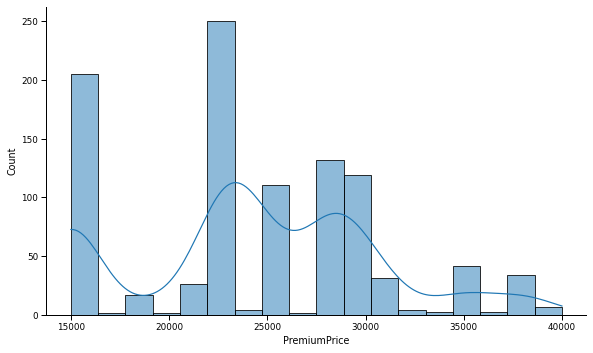

In [84]:
sns.displot(x='PremiumPrice',data=premium,aspect=10/6, kde=True)

not really a Gaussian distribution

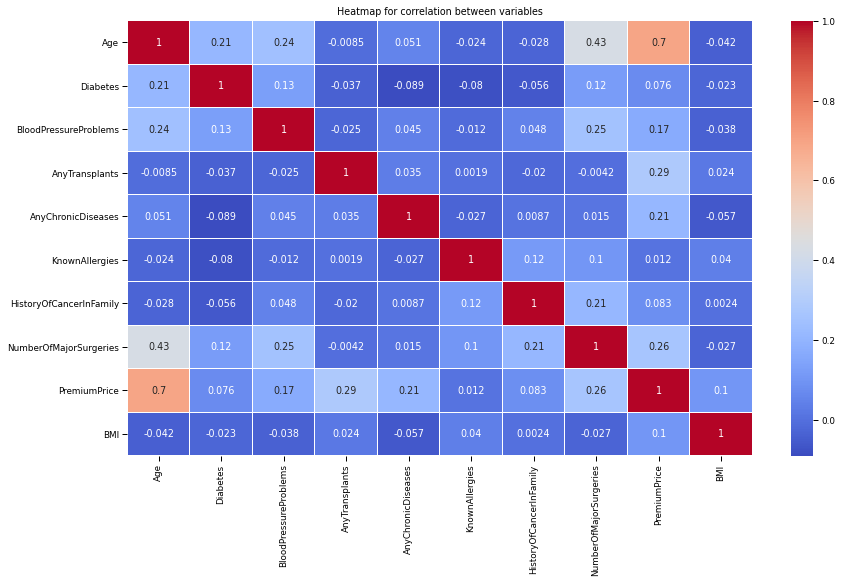

In [11]:
plt.figure(figsize=(14,8))
sns.heatmap(premium.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.title("Heatmap for correlation between variables")
plt.show()

In [80]:
from sklearn.ensemble import ExtraTreesClassifier
X=premium.drop('PremiumPrice', axis=1)
y=premium['PremiumPrice']
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.46050525 0.02395923 0.02476458 0.03795501 0.04944328 0.02495489
 0.03444276 0.1537828  0.1901922 ]


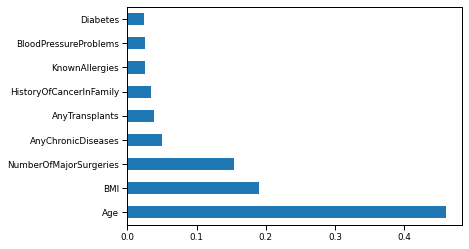

In [82]:
feat_imp =pd.Series(model.feature_importances_,index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
for i in df[num]:
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
    sns.histplot(df[i],kde=True,ax=axes[0],color='red')
    sns.boxplot(df[i],ax=axes[1],color='green')

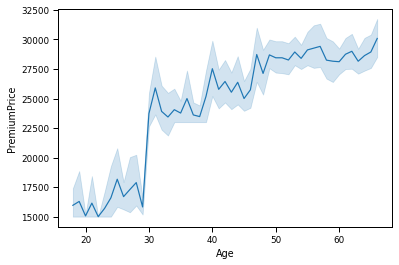

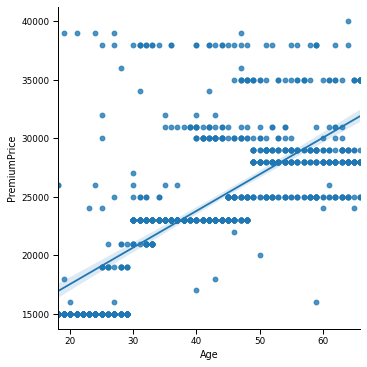

In [85]:
sns.lineplot(premium['Age'],premium['PremiumPrice'])
sns.lmplot(x='Age', y ='PremiumPrice',data=premium)

Text(0.5, 1.0, 'Distribution of AnyTransplants of users')

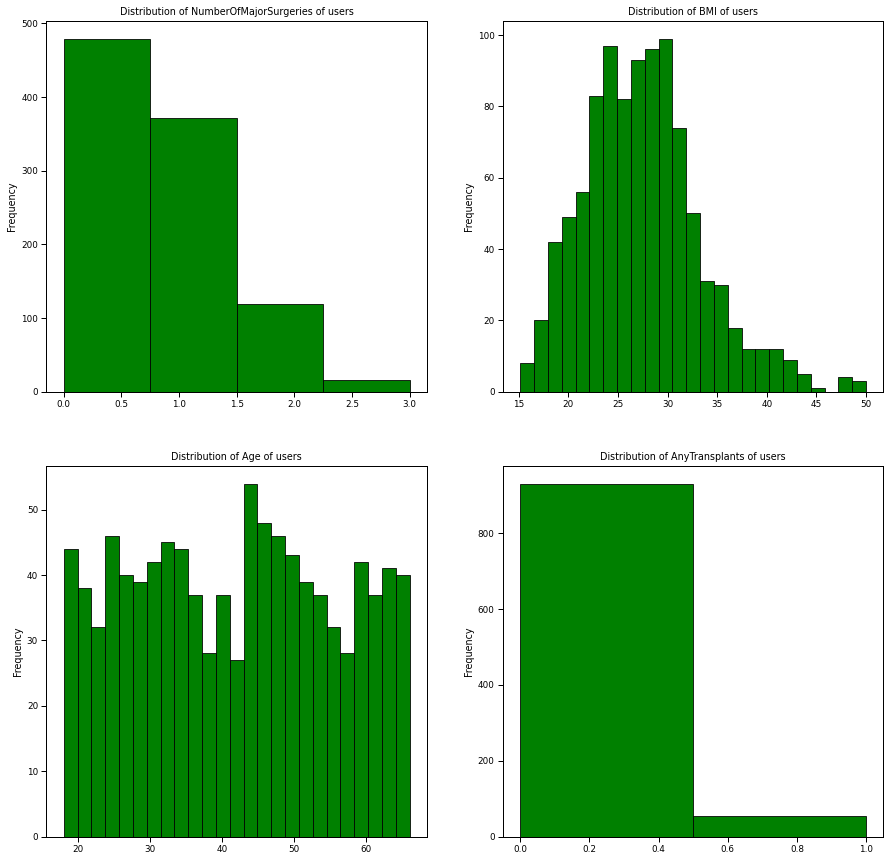

In [92]:
f,ax=plt.subplots(2,2,figsize=(15,15))

premium.NumberOfMajorSurgeries .plot.hist(bins = 4, edgecolor = 'black',color = 'green',ax=ax[0][0])
ax[0][0].set_title('Distribution of NumberOfMajorSurgeries of users')

premium.BMI.plot.hist(bins = 25, edgecolor = 'black',color = 'green',ax=ax[0][1])
ax[0][1].set_title('Distribution of BMI of users')

premium.Age.plot.hist(bins = 25, edgecolor = 'black',color = 'green',ax=ax[1][0])
ax[1][0].set_title('Distribution of Age of users')

premium.AnyTransplants.plot.hist(bins = 2, edgecolor = 'black',color = 'green',ax=ax[1][1])
ax[1][1].set_title('Distribution of AnyTransplants of users')

### Model

In [12]:
X=premium.drop('PremiumPrice', axis=1)
y=premium['PremiumPrice']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state= 43)

In [13]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Linear Regression

In [14]:
linearReg_model= LinearRegression()
linearReg_model.fit(X_train, y_train)

LinearRegression()

In [15]:
r2_score(y_test, linearReg_model.predict(X_test))

0.6929514302733693

In [16]:
cv_scores = cross_val_score(linearReg_model, X_train,y_train, cv = 10)

In [17]:
cv_scores.mean()

0.5795019659270289

In [18]:
cv_scores.std()

0.09455013673900155

In [19]:
X_test_pred = linearReg_model.predict(X_test)

print('MSE test data: %.3f, MAE test data: %.3f' % 
      (metrics.mean_squared_error(X_test_pred, y_test),
       metrics.mean_absolute_error(X_test_pred, y_test)))

MSE test data: 12859369.044, MAE test data: 2661.290


#### Ridge Regression

In [20]:
Ridge_model = Ridge(alpha=1)
Ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [21]:
r2_score(y_test, Ridge_model.predict(X_test))

0.6928348980778649

In [22]:
cv_scores = cross_val_score(Ridge_model, X_train,y_train, cv = 10)

In [23]:
cv_scores.mean()

0.5795470423586175

In [24]:
cv_scores.std()

0.09435441461089994

In [25]:
X_test_pred = Ridge_model.predict(X_test)

print('MSE test data: %.3f, MAE test data: %.3f' % 
      (metrics.mean_squared_error(X_test_pred, y_test),
       metrics.mean_absolute_error(X_test_pred, y_test)))

MSE test data: 12864249.479, MAE test data: 2662.631


#### Lasso Regression

In [26]:
Lasso_model = Lasso(alpha=0.1)
Lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [27]:
r2_score(y_test, Lasso_model.predict(X_test))

0.6929538611274888

In [28]:
cv_scores = cross_val_score(Lasso_model, X_train,y_train, cv = 10)

In [29]:
cv_scores.mean()

0.5795062286657757

In [30]:
cv_scores.std()

0.0945433566787731

In [31]:
X_test_pred = Lasso_model.predict(X_test)

print('MSE test data: %.3f, MAE test data: %.3f' % 
      (metrics.mean_squared_error(X_test_pred, y_test),
       metrics.mean_absolute_error(X_test_pred, y_test)))

MSE test data: 12859267.238, MAE test data: 2661.276


#### XGB Regressor Model

In [32]:
XGB_model =XGBRegressor()
XGB_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [33]:
r2_score(y_test, XGB_model.predict(X_test))

0.7298928529622041

In [34]:
cv_scores = cross_val_score(XGB_model, X_train,y_train, cv = 10)

In [35]:
cv_scores.mean()

0.6522291462917413

In [36]:
cv_scores.std()

0.12027030296490669

In [37]:
X_test_pred = XGB_model.predict(X_test)

print('MSE test data: %.3f, MAE test data: %.3f' % 
      (metrics.mean_squared_error(X_test_pred, y_test),
       metrics.mean_absolute_error(X_test_pred, y_test)))

MSE test data: 11312241.214, MAE test data: 1878.898


#### Gradient Boosting Regressor Model

In [38]:
GradientB_model = GradientBoostingRegressor()
GradientB_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [39]:
r2_score(y_test, GradientB_model.predict(X_test))

0.7969579536710389

In [40]:
cv_scores = cross_val_score(GradientB_model, X_train,y_train, cv = 10)

In [41]:
cv_scores.mean()

0.6936010160951177

In [42]:
cv_scores.std()

0.10974483630875645

In [43]:
X_test_pred = GradientB_model.predict(X_test)

print('MSE test data: %.3f, MAE test data: %.3f' % 
      (metrics.mean_squared_error(X_test_pred, y_test),
       metrics.mean_absolute_error(X_test_pred, y_test)))

MSE test data: 8503516.585, MAE test data: 1837.826


#### Decision Tree

In [44]:
tree_model =DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [45]:
r2_score(y_test, tree_model.predict(X_test))

0.5828711334362382

In [46]:
cv_scores = cross_val_score(tree_model, X_train,y_train, cv = 10)

In [47]:
cv_scores.mean()

0.5338696710916546

In [48]:
cv_scores.std()

0.19480339295637145

In [49]:
X_test_pred = tree_model.predict(X_test)

print('MSE test data: %.3f, MAE test data: %.3f' % 
      (metrics.mean_squared_error(X_test_pred, y_test),
       metrics.mean_absolute_error(X_test_pred, y_test)))

MSE test data: 17469594.595, MAE test data: 1584.459


#### RandomForest

In [50]:
Rfr_model = RandomForestRegressor(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr_model.fit(X_train,y_train)
X_test_pred = Rfr_model.predict(X_test)
r2_score(y_test, X_test_pred)

0.7981359986134003

In [51]:
param_grid = {
    "n_estimators": [50, 100,200,400], 
    "max_depth":([6, 12]), 
    "min_samples_split":[2, 4], 
    "min_samples_leaf":[2, 4], 
}
#Random forest classifier
Rfr_model = RandomForestRegressor(bootstrap=False,random_state=1)
tree_cv = GridSearchCV(estimator=Rfr_model, param_grid = param_grid, n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best paramters: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100})


In [52]:
Rfr_model = RandomForestRegressor(**best_params,criterion = 'mse',random_state=1)

In [53]:
Rfr_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=2, random_state=1)

In [54]:
r2_score(y_test, Rfr_model.predict(X_test))

0.8139517500745572

In [55]:
X_test_pred = Rfr_model.predict(X_test)

print('MSE test data: %.3f, MAE test data: %.3f' % 
      (metrics.mean_squared_error(X_test_pred, y_test),
       metrics.mean_absolute_error(X_test_pred, y_test)))

MSE test data: 7791806.710, MAE test data: 1634.513


#### Neural network

In [56]:
X=premium.drop('PremiumPrice', axis=1)
y=premium['PremiumPrice']


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state= 43)

In [58]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [59]:
model = tf.keras.models.Sequential([              # model type
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  #tf.keras.layers.Dropout(0.2),                   
  tf.keras.layers.Dense(1, activation='linear')                                            
])

In [60]:
#compile
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              loss='mean_absolute_error', #need to define our loss function)
             )

In [61]:
batch_size = 150   # during training to find the gradient
epochs     = 100   # how long to train

In [62]:
#tstart = tf.timestamp()
history = model.fit(X_train, y_train, 
                    epochs=epochs,batch_size=batch_size,
                    validation_split = 0.2) # Data for evaluation
#total_time = tf.timestamp() - tstart
#print("total time %3.3f seconds"%total_time)

Epoch 1/100
4/4 [==============================] - 1s 45ms/step - loss: 24490.7871 - val_loss: 24282.0430
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 24476.9629 - val_loss: 24253.8184
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 24432.7227 - val_loss: 24177.4219
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 24322.9551 - val_loss: 24004.4668
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 24084.5293 - val_loss: 23656.0059
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 23619.4531 - val_loss: 23012.3633
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 22785.9922 - val_loss: 21899.5898
Epoch 8/100
4/4 [==============================] - 0s 14ms/step - loss: 21369.5723 - val_loss: 20068.3945
Epoch 9/100
4/4 [==============================] - 0s 9ms/step - loss: 19083.8477 - val_loss: 17187.5117
Epoch 10/100
4/4 [==============================] 

4/4 [==============================] - 0s 5ms/step - loss: 2333.1611 - val_loss: 3032.4375
Epoch 80/100
4/4 [==============================] - 0s 10ms/step - loss: 2316.9531 - val_loss: 3033.7471
Epoch 81/100
4/4 [==============================] - 0s 6ms/step - loss: 2308.2405 - val_loss: 3006.1497
Epoch 82/100
4/4 [==============================] - 0s 7ms/step - loss: 2303.2192 - val_loss: 3028.1292
Epoch 83/100
4/4 [==============================] - 0s 12ms/step - loss: 2298.4634 - val_loss: 3022.9680
Epoch 84/100
4/4 [==============================] - 0s 11ms/step - loss: 2304.2615 - val_loss: 3031.3999
Epoch 85/100
4/4 [==============================] - 0s 11ms/step - loss: 2296.8081 - val_loss: 2981.6545
Epoch 86/100
4/4 [==============================] - 0s 11ms/step - loss: 2295.2422 - val_loss: 3036.8550
Epoch 87/100
4/4 [==============================] - 0s 8ms/step - loss: 2305.4773 - val_loss: 3025.7588
Epoch 88/100
4/4 [==============================] - 0s 6ms/step - loss: 

In [63]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

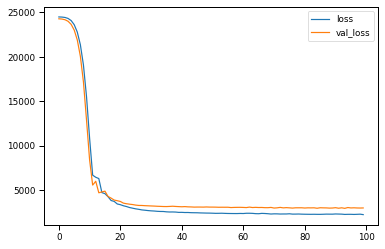

In [64]:
loss.plot()


In [65]:
y_pred = model.predict(X_test)

In [66]:
combinedArray = np.column_stack((y_test[0:20],y_pred[0:20]))
print("Actual  Predicted ")
s = [[str(e) for e in row] for row in np.around(combinedArray, 2)]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print ('\n'.join(table))

Actual  Predicted 
15000.0	20501.45
15000.0	16990.82
23000.0	24831.55
15000.0	20365.87
23000.0	20870.87
35000.0	30331.65
29000.0	34500.35
25000.0	28389.56
38000.0	36748.15
23000.0	22801.07
25000.0	27663.07
23000.0	25584.25
30000.0	23086.55
23000.0	23956.35
29000.0	28895.63
15000.0	20447.75
28000.0	28591.98
23000.0	24126.6 
23000.0	24042.06
35000.0	27496.42


In [67]:
r2_score(y_test, model.predict(X_test))

0.6469498571325911

Use Grid search CV to find best parameter

In [68]:
model = tf.keras.models.Sequential([              # model type
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  #tf.keras.layers.Dropout(0.2),                   
  tf.keras.layers.Dense(1, activation='linear')                                            
])

In [69]:
def Model(optimizer):
    tf.random.set_seed(0)                             # set our initial seed
    model = tf.keras.models.Sequential([             # model type
         tf.keras.layers.Dense(128, activation='relu'),
         tf.keras.layers.Dense(64, activation='relu'),
         tf.keras.layers.Dense(32, activation='relu'),                 
         tf.keras.layers.Dense(1, activation='linear') 
    ])
    model.compile(optimizer = optimizer,
              loss='mean_absolute_error', #need to define our loss function)
             )
    return model 

In [70]:
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

model = KerasRegressor(build_fn = Model)

parameters = {'batch_size': [16, 32, 64, 128],
              'epochs': [100, 150,],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 5)
grid_search = grid_search.fit(X_train, y_train, verbose = 0)

In [71]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: " + str(best_parameters))


Best Parameters: {'batch_size': 16, 'epochs': 150, 'optimizer': 'adam'}


In [72]:
batch_size = 16   # during training to find the gradient
epochs     = 150   # how long to train

In [73]:
model = tf.keras.models.Sequential([              # model type
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  #tf.keras.layers.Dropout(0.2),                   
  tf.keras.layers.Dense(1, activation='linear')                                            
])

In [74]:
#compile
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              loss='mean_absolute_error', #need to define our loss function)
             )

In [75]:
#tstart = tf.timestamp()
history = model.fit(X_train, y_train, 
                    epochs=epochs,batch_size=batch_size,
                    validation_split = 0.2) # Data for evaluation
#total_time = tf.timestamp() - tstart
#print("total time %3.3f seconds"%total_time)

Epoch 1/150
35/35 [==============================] - 0s 4ms/step - loss: 23659.3125 - val_loss: 19525.3945
Epoch 2/150
35/35 [==============================] - 0s 2ms/step - loss: 8900.2041 - val_loss: 4919.1655
Epoch 3/150
35/35 [==============================] - 0s 2ms/step - loss: 3701.9668 - val_loss: 3566.1077
Epoch 4/150
35/35 [==============================] - 0s 2ms/step - loss: 3216.9719 - val_loss: 3565.5303
Epoch 5/150
35/35 [==============================] - 0s 2ms/step - loss: 2939.7173 - val_loss: 3240.2903
Epoch 6/150
35/35 [==============================] - 0s 2ms/step - loss: 2841.5703 - val_loss: 3200.3682
Epoch 7/150
35/35 [==============================] - 0s 2ms/step - loss: 2793.2444 - val_loss: 3456.5203
Epoch 8/150
35/35 [==============================] - 0s 2ms/step - loss: 2779.6970 - val_loss: 3013.3469
Epoch 9/150
35/35 [==============================] - 0s 2ms/step - loss: 2720.1042 - val_loss: 3138.2839
Epoch 10/150
35/35 [==============================] -

35/35 [==============================] - 0s 2ms/step - loss: 2421.6284 - val_loss: 3021.3018
Epoch 79/150
35/35 [==============================] - 0s 2ms/step - loss: 2412.9363 - val_loss: 3120.2671
Epoch 80/150
35/35 [==============================] - 0s 2ms/step - loss: 2363.0586 - val_loss: 3036.0447
Epoch 81/150
35/35 [==============================] - 0s 2ms/step - loss: 2300.5955 - val_loss: 3029.0156
Epoch 82/150
35/35 [==============================] - 0s 2ms/step - loss: 2422.2666 - val_loss: 3047.1250
Epoch 83/150
35/35 [==============================] - 0s 2ms/step - loss: 2273.0859 - val_loss: 2958.9775
Epoch 84/150
35/35 [==============================] - 0s 2ms/step - loss: 2308.8059 - val_loss: 3253.2390
Epoch 85/150
35/35 [==============================] - 0s 2ms/step - loss: 2342.4304 - val_loss: 2986.7576
Epoch 86/150
35/35 [==============================] - 0s 2ms/step - loss: 2355.6921 - val_loss: 3069.3523
Epoch 87/150
35/35 [==============================] - 0s 2m

In [76]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

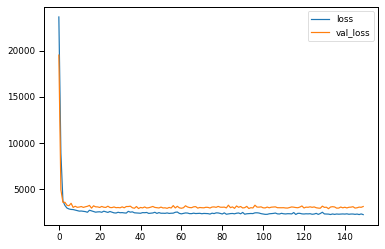

In [77]:
loss.plot()

In [78]:
r2_score(y_test, model.predict(X_test))

0.6080953162456413